In [3]:
# 分析に必要なライブラリをインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn           as sns
from sklearn.metrics import silhouette_samples
import codecs
import chardet
import japanize_matplotlib
%matplotlib inline

ModuleNotFoundError: No module named 'chardet'

In [2]:
# データに日本語が含まれており、
# 表中に日本語を文字化けさせない設定を実行
plt.rcParams['font.family'] = 'VL PGothic'
sns.set(font='IPAexGothic')

In [3]:
# print関数でnumpyの指数表記をさせないため、numpyのデータ表現設定を変更
np.set_printoptions(suppress=True)

In [4]:
df_demogra = pd.read_csv('data/grouping_demograph.csv', encoding="shift-jis", engine='python',\
                         names=('ID', 'sex', 'age', '結婚', '飲酒',  '職業', '学歴', '世帯年収', '自由資金（1ヶ月）',\
                                '趣味','コンビニ頻度'), skiprows=1)
df_demogra

,ID,sex,age,結婚,飲酒,職業,学歴,世帯年収,自由資金（1ヶ月）,趣味,コンビニ頻度
0,1,男性,63,既婚,飲酒しない,無職,大学卒,400,30000,"映画鑑賞,国内旅行",週に1回程度
1,2,女性,46,既婚,飲酒しない,専業主婦/主夫,専門学校卒(専修学校卒を含む),200,0,"インターネット,ギャンブル,携帯型ゲーム(ニンテンドーDS、プレイステーションVita、スマ...",月に1回程度
2,3,男性,69,既婚,飲酒する,無職,大学卒,700,0,スポーツ,月に2〜3回程度
3,4,男性,62,既婚,飲酒しない,経営者・会社役員,大学卒,1700,100000,ギャンブル,週に4回以上
4,5,男性,59,既婚,飲酒する,会社員(正社員),高等学校卒,400,50000,日曜大工・DIY,月に2〜3回程度
...,...,...,...,...,...,...,...,...,...,...,...
1061,1062,女性,16,未婚,飲酒しない,学生,高等学校在学中,700,5000,"カラオケ,映画鑑賞,音楽鑑賞",月に2〜3回程度
1062,1063,女性,18,未婚,飲酒しない,学生,高等学校在学中,1200,30000,"音楽鑑賞,その他",週に2〜3回程度
1063,1064,男性,18,未婚,飲酒しない,学生,高等学校在学中,500,10000,なし,週に1回程度
1064,1065,女性,18,未婚,飲酒しない,学生,大学在学中,960,5000,"ダンス,手芸・工芸",週に2〜3回程度


In [5]:
df_demogra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         1066 non-null   int64 
 1   sex        1066 non-null   object
 2   age        1066 non-null   int64 
 3   結婚         1066 non-null   object
 4   飲酒         1066 non-null   object
 5   職業         1066 non-null   object
 6   学歴         1066 non-null   object
 7   世帯年収       1066 non-null   int64 
 8   自由資金（1ヶ月）  1066 non-null   int64 
 9   趣味         1066 non-null   object
 10  コンビニ頻度     1066 non-null   object
dtypes: int64(4), object(7)
memory usage: 91.7+ KB


In [6]:
df_demogra['コンビニ頻度']  = df_demogra['コンビニ頻度'].replace({'月に1回程度':12, '週に1回程度':58, '月に2〜3回程度':30,\
                                '週に2〜3回程度':145, '最近1年間は利用していない':0, '2〜3ヵ月に1回程度':5,'週に4回以上':232,\
                                '6ヶ月に1回程度':2,'1年に1回程度':1})
df_demogra

,ID,sex,age,結婚,飲酒,職業,学歴,世帯年収,自由資金（1ヶ月）,趣味,コンビニ頻度
0,1,男性,63,既婚,飲酒しない,無職,大学卒,400,30000,"映画鑑賞,国内旅行",58
1,2,女性,46,既婚,飲酒しない,専業主婦/主夫,専門学校卒(専修学校卒を含む),200,0,"インターネット,ギャンブル,携帯型ゲーム(ニンテンドーDS、プレイステーションVita、スマ...",12
2,3,男性,69,既婚,飲酒する,無職,大学卒,700,0,スポーツ,30
3,4,男性,62,既婚,飲酒しない,経営者・会社役員,大学卒,1700,100000,ギャンブル,232
4,5,男性,59,既婚,飲酒する,会社員(正社員),高等学校卒,400,50000,日曜大工・DIY,30
...,...,...,...,...,...,...,...,...,...,...,...
1061,1062,女性,16,未婚,飲酒しない,学生,高等学校在学中,700,5000,"カラオケ,映画鑑賞,音楽鑑賞",30
1062,1063,女性,18,未婚,飲酒しない,学生,高等学校在学中,1200,30000,"音楽鑑賞,その他",145
1063,1064,男性,18,未婚,飲酒しない,学生,高等学校在学中,500,10000,なし,58
1064,1065,女性,18,未婚,飲酒しない,学生,大学在学中,960,5000,"ダンス,手芸・工芸",145


# 1_ターゲット選定

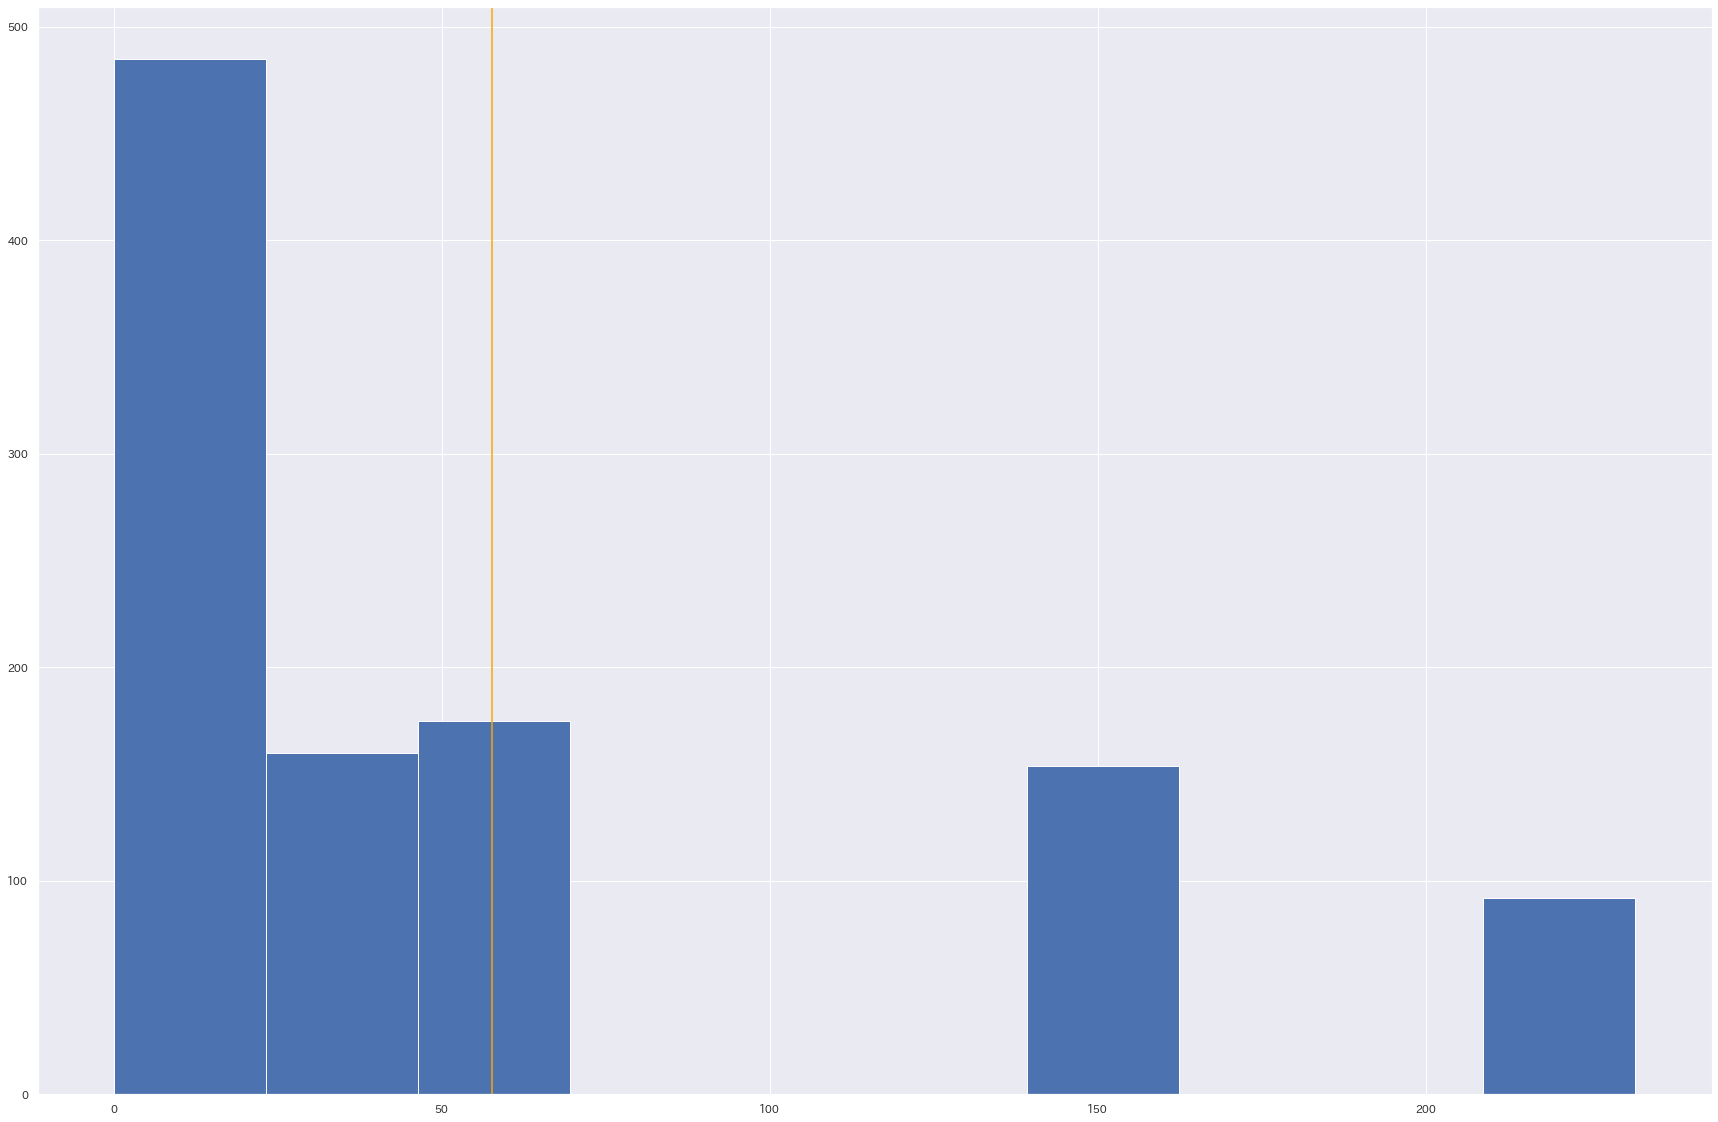

In [7]:
plt.figure(figsize=(30, 20))
plt.hist(df_demogra['コンビニ頻度'])
plt.axvline(df_demogra['コンビニ頻度'].mean(), color='orange')
plt.show()

In [8]:
df_target = df_demogra[df_demogra['コンビニ頻度'] >= df_demogra['コンビニ頻度'].mean()]
df_target

,ID,sex,age,結婚,飲酒,職業,学歴,世帯年収,自由資金（1ヶ月）,趣味,コンビニ頻度
0,1,男性,63,既婚,飲酒しない,無職,大学卒,400,30000,"映画鑑賞,国内旅行",58
3,4,男性,62,既婚,飲酒しない,経営者・会社役員,大学卒,1700,100000,ギャンブル,232
5,6,女性,36,未婚,飲酒しない,無職,中学校卒,300,10000,"インターネット,グルメ,携帯型ゲーム(ニンテンドーDS、プレイステーションVita、スマート...",145
6,7,男性,63,既婚,飲酒する,自営業,大学卒,700,50000,なし,232
8,9,男性,60,既婚,飲酒する,自営業,短大卒(高専卒を含む),600,30000,ペット,58
...,...,...,...,...,...,...,...,...,...,...,...
1056,1057,女性,15,未婚,飲酒しない,学生,高等学校在学中,550,3000,"カラオケ,携帯型ゲーム(ニンテンドーDS、プレイステーションVita、スマートフォン、タブレ...",58
1058,1059,女性,35,未婚,飲酒しない,会社員(契約社員),大学院卒,600,10000,"スポーツ,ペット,映画鑑賞",58
1062,1063,女性,18,未婚,飲酒しない,学生,高等学校在学中,1200,30000,"音楽鑑賞,その他",145
1063,1064,男性,18,未婚,飲酒しない,学生,高等学校在学中,500,10000,なし,58


# 2_購入商品でクラスタリング

In [9]:
l_brand = ['data/q21_new.csv','data/q301_data_pro.csv','data/q23_data_pro.csv','data/q25_new.csv','data/q26_new.csv','data/q27_new.csv',\
        'data/q701_data_pro.csv','data/q28_new.csv','data/q29_new.csv','data/q34_new.csv','data/q35_new.csv','data/q36_new.csv',\
        'data/q37_data_pro.csv','data/q39_data_pro.csv', 'data/q40_data_pro.csv', 'data/q41_new.csv','data/q43_new.csv',\
         'data/q45_new.csv','data/q46_new.csv','data/q275_new.csv']

df_t_merged = df_target.copy()

for file_name in l_brand:

    #文字コードの判別
    with open(file_name, "rb") as file:
        code_dict = chardet.detect(file.read())
        print(code_dict)
        
    if code_dict["encoding"] == "UTF-8-SIG":
        with codecs.open(file_name, "r", "utf-8", "ignore") as file:
            df = pd.read_csv(file)
            df_t_merged = pd.merge(df_t_merged, df, how='left',  on='ID')
            
    else:
        with codecs.open(file_name, "r", "shift-jis", "ignore") as file:
            df = pd.read_csv(file)
            df_t_merged = pd.merge(df_t_merged, df, how='left',  on='ID')

df_t_merged

{'encoding': 'SHIFT_JIS', 'confidence': 0.99, 'language': 'Japanese'}
{'encoding': None, 'confidence': 0.0, 'language': None}
{'encoding': 'SHIFT_JIS', 'confidence': 0.99, 'language': 'Japanese'}
{'encoding': 'SHIFT_JIS', 'confidence': 0.8333333333333334, 'language': 'Japanese'}
{'encoding': 'SHIFT_JIS', 'confidence': 0.99, 'language': 'Japanese'}
{'encoding': 'SHIFT_JIS', 'confidence': 0.5833333333333334, 'language': 'Japanese'}
{'encoding': 'SHIFT_JIS', 'confidence': 0.99, 'language': 'Japanese'}
{'encoding': 'SHIFT_JIS', 'confidence': 0.26666666666666666, 'language': 'Japanese'}
{'encoding': 'SHIFT_JIS', 'confidence': 0.6666666666666666, 'language': 'Japanese'}
{'encoding': None, 'confidence': 0.0, 'language': None}
{'encoding': None, 'confidence': 0.0, 'language': None}
{'encoding': None, 'confidence': 0.0, 'language': None}
{'encoding': None, 'confidence': 0.0, 'language': None}
{'encoding': 'SHIFT_JIS', 'confidence': 0.99, 'language': 'Japanese'}
{'encoding': None, 'confidence': 

,ID,sex,age,結婚,飲酒,職業,学歴,世帯年収,自由資金（1ヶ月）,趣味,...,よく購入する微糖コーヒーはあるか,よく購入するスタンダードコーヒーはあるか,よく購入するカフェオレ・カフェラテはあるか,よく購入するビールはあるか,よく購入する発泡酒はあるか,よく購入する第3のビールはあるか,よく購入するハイボールはあるか,よく購入するチューハイはあるか,よく購入するノンアルビールはあるか,よく購入するノンアルチューハイはあるか
0,1,男性,63,既婚,飲酒しない,無職,大学卒,400,30000,"映画鑑賞,国内旅行",...,0,1,0,0,0,0,0,0,1,0
1,4,男性,62,既婚,飲酒しない,経営者・会社役員,大学卒,1700,100000,ギャンブル,...,0,0,0,0,0,0,0,0,0,0
2,6,女性,36,未婚,飲酒しない,無職,中学校卒,300,10000,"インターネット,グルメ,携帯型ゲーム(ニンテンドーDS、プレイステーションVita、スマート...",...,0,0,0,0,0,0,0,0,0,0
3,7,男性,63,既婚,飲酒する,自営業,大学卒,700,50000,なし,...,0,0,0,0,0,1,0,0,0,0
4,9,男性,60,既婚,飲酒する,自営業,短大卒(高専卒を含む),600,30000,ペット,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,1057,女性,15,未婚,飲酒しない,学生,高等学校在学中,550,3000,"カラオケ,携帯型ゲーム(ニンテンドーDS、プレイステーションVita、スマートフォン、タブレ...",...,0,0,0,0,0,0,0,0,0,0
417,1059,女性,35,未婚,飲酒しない,会社員(契約社員),大学院卒,600,10000,"スポーツ,ペット,映画鑑賞",...,0,0,0,0,0,0,0,0,0,0
418,1063,女性,18,未婚,飲酒しない,学生,高等学校在学中,1200,30000,"音楽鑑賞,その他",...,0,0,0,0,0,0,0,0,0,0
419,1064,男性,18,未婚,飲酒しない,学生,高等学校在学中,500,10000,なし,...,1,1,0,0,0,0,0,0,0,0


In [10]:
df_t_merged =  df_t_merged.drop(columns=['sex', 'age', '結婚', '飲酒', '職業', '学歴', '世帯年収', '自由資金（1ヶ月）', '趣味',
                                           'コンビニ頻度']).set_index('ID')
df_t_merged

,よく購入するチョコレート菓子はあるか,よく購入するクッキー・ビスケットはあるか,よく購入する米菓はあるか,よく購入するスナック菓子はあるか,よく購入するキャンディはあるか,よく購入するグミはあるか,よく購入するタブレットはあるか,よく購入するキャラメルはあるか,よく購入する棒アイス（バニラ、チョコ）はあるか,よく購入する棒アイス（果実）はあるか,...,よく購入する微糖コーヒーはあるか,よく購入するスタンダードコーヒーはあるか,よく購入するカフェオレ・カフェラテはあるか,よく購入するビールはあるか,よく購入する発泡酒はあるか,よく購入する第3のビールはあるか,よく購入するハイボールはあるか,よく購入するチューハイはあるか,よく購入するノンアルビールはあるか,よく購入するノンアルチューハイはあるか
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1063,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2-1 特徴量エンジニアリング

In [11]:
df_t_merged.columns

Index(['よく購入するチョコレート菓子はあるか', 'よく購入するクッキー・ビスケットはあるか', 'よく購入する米菓はあるか',
       'よく購入するスナック菓子はあるか', 'よく購入するキャンディはあるか', 'よく購入するグミはあるか',
       'よく購入するタブレットはあるか', 'よく購入するキャラメルはあるか', 'よく購入する棒アイス（バニラ、チョコ）はあるか',
       'よく購入する棒アイス（果実）はあるか', 'よく購入する棒アイス（その他）はあるか',
       'よく購入するカップアイス（バニラ、チョコ）はあるか', 'よく購入するカップアイス（果実）はあるか',
       'よく購入するカップアイス（その他）はあるか', 'よく購入するコーンアイス（バニラ、チョコ）はあるか',
       'よく購入するコーンアイス（果実）はあるか', 'よく購入するコーンアイス（その他）はあるか', 'よく購入するヨーグルトはあるか',
       'よく購入する脂肪0、低脂肪のヨーグルトはあるか', 'よく購入するカップゼリー・寒天はあるか', 'よく購入する即席ラーメンはあるか',
       'よく購入する即席うどんはあるか', 'よく購入する即席そばはあるか', 'よく購入する即席焼きそばはあるか',
       'よく購入する即席スープはあるか', 'よく購入する冷凍食品(麺)はあるか', 'よく購入する冷凍食品(米)はあるか',
       'よく購入する冷凍食品(おかず)はあるか', 'よく購入する栄養飲料はあるか', 'よく購入する炭酸飲料はあるか',
       'よく購入する野菜ジュースはあるか', 'よく購入する果汁飲料はあるか', 'よく購入する水はあるか', 'よく購入する炭酸水はあるか',
       'よく購入するその他お茶はあるか', 'よく購入するブレンド茶はあるか', 'よく購入する烏龍茶はあるか', 'よく購入する紅茶はあるか',
       'よく購入する緑茶はあるか', 'よく購入するスポーツ・機能性飲料はあるか', 'よく購入する乳酸菌飲料はあるか',
       'よく購入する乳製品飲料はあるか', 'よく購入する豆乳飲料はあるか', 'よく購入するブラ

In [12]:
# 特徴量エンジニアリング
df_test=pd.DataFrame
df_test = df_t_merged.copy()
df_test

,よく購入するチョコレート菓子はあるか,よく購入するクッキー・ビスケットはあるか,よく購入する米菓はあるか,よく購入するスナック菓子はあるか,よく購入するキャンディはあるか,よく購入するグミはあるか,よく購入するタブレットはあるか,よく購入するキャラメルはあるか,よく購入する棒アイス（バニラ、チョコ）はあるか,よく購入する棒アイス（果実）はあるか,...,よく購入する微糖コーヒーはあるか,よく購入するスタンダードコーヒーはあるか,よく購入するカフェオレ・カフェラテはあるか,よく購入するビールはあるか,よく購入する発泡酒はあるか,よく購入する第3のビールはあるか,よく購入するハイボールはあるか,よく購入するチューハイはあるか,よく購入するノンアルビールはあるか,よく購入するノンアルチューハイはあるか
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1059,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1063,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# 特徴量作成
df_test['菓子（甘）'] = df_test[['よく購入するチョコレート菓子はあるか','よく購入するクッキー・ビスケットはあるか']].sum(axis=1)
df_test['キャンディ等'] = df_test[[ 'よく購入するキャンディはあるか', 'よく購入するグミはあるか',
       'よく購入するタブレットはあるか', 'よく購入するキャラメルはあるか']].sum(axis=1)
df_test['アイス'] = df_test[['よく購入する棒アイス（バニラ、チョコ）はあるか',
       'よく購入する棒アイス（果実）はあるか', 'よく購入する棒アイス（その他）はあるか',
       'よく購入するカップアイス（バニラ、チョコ）はあるか', 'よく購入するカップアイス（果実）はあるか',
       'よく購入するカップアイス（その他）はあるか', 'よく購入するコーンアイス（バニラ、チョコ）はあるか',
       'よく購入するコーンアイス（果実）はあるか', 'よく購入するコーンアイス（その他）はあるか']].sum(axis=1)
df_test['ヨーグルト等'] = df_test[['よく購入するヨーグルトはあるか',
       'よく購入する脂肪0、低脂肪のヨーグルトはあるか', 'よく購入するカップゼリー・寒天はあるか']].sum(axis=1)
df_test['カップめん'] = df_test[[ 'よく購入する即席ラーメンはあるか',
       'よく購入する即席うどんはあるか', 'よく購入する即席そばはあるか', 'よく購入する即席焼きそばはあるか',
       'よく購入する即席スープはあるか']].sum(axis=1)
df_test['冷凍食品'] = df_test[[ 'よく購入する冷凍食品(麺)はあるか', 'よく購入する冷凍食品(米)はあるか',
       'よく購入する冷凍食品(おかず)はあるか']].sum(axis=1)               
df_test['コーヒー飲料'] = df_test[[ 'よく購入するブラックコーヒーはあるか',
       'よく購入する微糖コーヒーはあるか', 'よく購入するスタンダードコーヒーはあるか', 'よく購入するカフェオレ・カフェラテはあるか']].sum(axis=1) 
df_test['酒類'] = df_test[[ 'よく購入するビールはあるか', 'よく購入する発泡酒はあるか', 'よく購入する第3のビールはあるか', 'よく購入するハイボールはあるか',
       'よく購入するチューハイはあるか', 'よく購入するノンアルビールはあるか', 'よく購入するノンアルチューハイはあるか']].sum(axis=1)
df_test['お茶類'] = df_test[[ 'よく購入するその他お茶はあるか', 'よく購入するブレンド茶はあるか', 'よく購入する烏龍茶はあるか', 'よく購入する紅茶はあるか',
       'よく購入する緑茶はあるか']].sum(axis=1)
df_test['菓子（辛）'] = df_test[[ 'よく購入する米菓はあるか','よく購入するスナック菓子はあるか']].sum(axis=1)
df_test['清涼飲料'] = df_test[[ 'よく購入する栄養飲料はあるか', 'よく購入する炭酸飲料はあるか']].sum(axis=1)
df_test['健康飲料'] = df_test[['よく購入する野菜ジュースはあるか','よく購入する果汁飲料はあるか']].sum(axis=1)
df_test['水等'] = df_test[['よく購入する水はあるか','よく購入する炭酸水はあるか']].sum(axis=1)
df_test['機能性飲料'] = df_test['よく購入するスポーツ・機能性飲料はあるか']
df_test['乳酸菌飲料'] = df_test[ 'よく購入する乳酸菌飲料はあるか'] 
df_test['乳飲料等'] = df_test[ 'よく購入する乳製品飲料はあるか','よく購入する豆乳飲料はあるか']

df_test

,よく購入するチョコレート菓子はあるか,よく購入するクッキー・ビスケットはあるか,よく購入する米菓はあるか,よく購入するスナック菓子はあるか,よく購入するキャンディはあるか,よく購入するグミはあるか,よく購入するタブレットはあるか,よく購入するキャラメルはあるか,よく購入する棒アイス（バニラ、チョコ）はあるか,よく購入する棒アイス（果実）はあるか,...,よく購入するノンアルチューハイはあるか,菓子（甘）,キャンディ等,アイス,ヨーグルト等,カップめん,冷凍食品,コーヒー飲料,酒類,お茶類
ID,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,1,0,1,0,0,0,0,0,0,...,0,2,0,2,2,1,1,0,0,1
7,1,1,1,1,0,0,0,0,0,1,...,0,2,0,3,1,0,0,0,1,1
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,1,0,0,1,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,1
1059,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1063,1,1,0,1,0,0,0,0,0,0,...,0,2,0,3,1,1,0,0,0,1


In [14]:
# 特徴量削除
df_test = df_test.drop(columns=['よく購入するチョコレート菓子はあるか','よく購入するクッキー・ビスケットはあるか'])
df_test = df_test.drop(columns=[ 'よく購入するキャンディはあるか', 'よく購入するグミはあるか',
       'よく購入するタブレットはあるか', 'よく購入するキャラメルはあるか'])
df_test = df_test.drop(columns=['よく購入する棒アイス（バニラ、チョコ）はあるか',
       'よく購入する棒アイス（果実）はあるか', 'よく購入する棒アイス（その他）はあるか',
       'よく購入するカップアイス（バニラ、チョコ）はあるか', 'よく購入するカップアイス（果実）はあるか',
       'よく購入するカップアイス（その他）はあるか', 'よく購入するコーンアイス（バニラ、チョコ）はあるか',
       'よく購入するコーンアイス（果実）はあるか', 'よく購入するコーンアイス（その他）はあるか'])
df_test = df_test.drop(columns=['よく購入するヨーグルトはあるか',
       'よく購入する脂肪0、低脂肪のヨーグルトはあるか', 'よく購入するカップゼリー・寒天はあるか'])
df_test = df_test.drop(columns=['よく購入する即席ラーメンはあるか',
       'よく購入する即席うどんはあるか', 'よく購入する即席そばはあるか', 'よく購入する即席焼きそばはあるか',
       'よく購入する即席スープはあるか'])
df_test = df_test.drop(columns=['よく購入する冷凍食品(麺)はあるか', 'よく購入する冷凍食品(米)はあるか',
       'よく購入する冷凍食品(おかず)はあるか'])
df_test = df_test.drop(columns=[ 'よく購入するブラックコーヒーはあるか',
       'よく購入する微糖コーヒーはあるか', 'よく購入するスタンダードコーヒーはあるか', 'よく購入するカフェオレ・カフェラテはあるか'])
df_test = df_test.drop(columns=[ 'よく購入するビールはあるか', 'よく購入する発泡酒はあるか', 'よく購入する第3のビールはあるか', 'よく購入するハイボールはあるか',
       'よく購入するチューハイはあるか', 'よく購入するノンアルビールはあるか', 'よく購入するノンアルチューハイはあるか'])
df_test = df_test.drop(columns=[ 'よく購入するその他お茶はあるか', 'よく購入するブレンド茶はあるか', 'よく購入する烏龍茶はあるか', 'よく購入する紅茶はあるか',
       'よく購入する緑茶はあるか'])
df_test = df_test.drop(columns=['よく購入する米菓はあるか','よく購入するスナック菓子はあるか'])
df_test = df_test.drop(columns=['よく購入する栄養飲料はあるか', 'よく購入する炭酸飲料はあるか'])
df_test = df_test.drop(columns=['よく購入する野菜ジュースはあるか','よく購入する果汁飲料はあるか'])
df_test = df_test.drop(columns=['よく購入する水はあるか','よく購入する炭酸水はあるか'])

df_test = df_test.drop(columns=['よく購入するスポーツ・機能性飲料はあるか', 'よく購入する乳酸菌飲料はあるか', 'よく購入する乳製品飲料はあるか', 'よく購入する豆乳飲料はあるか'])
df_test

,よく購入する米菓はあるか,よく購入するスナック菓子はあるか,よく購入する栄養飲料はあるか,よく購入する炭酸飲料はあるか,よく購入する野菜ジュースはあるか,よく購入する果汁飲料はあるか,よく購入する水はあるか,よく購入する炭酸水はあるか,よく購入するスポーツ・機能性飲料はあるか,よく購入する乳酸菌飲料はあるか,...,よく購入する豆乳飲料はあるか,菓子（甘）,キャンディ等,アイス,ヨーグルト等,カップめん,冷凍食品,コーヒー飲料,酒類,お茶類
ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,1,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,1,...,1,2,0,2,2,1,1,0,0,1
7,1,1,0,0,0,0,0,0,0,0,...,0,2,0,3,1,0,0,0,1,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,0,1,1,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,1
1059,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1063,0,1,0,1,0,0,0,0,1,1,...,0,2,0,3,1,1,0,0,0,1


In [15]:
df_test.columns

Index(['よく購入する米菓はあるか', 'よく購入するスナック菓子はあるか', 'よく購入する栄養飲料はあるか', 'よく購入する炭酸飲料はあるか',
       'よく購入する野菜ジュースはあるか', 'よく購入する果汁飲料はあるか', 'よく購入する水はあるか', 'よく購入する炭酸水はあるか',
       'よく購入するスポーツ・機能性飲料はあるか', 'よく購入する乳酸菌飲料はあるか', 'よく購入する乳製品飲料はあるか',
       'よく購入する豆乳飲料はあるか', '菓子（甘）', 'キャンディ等', 'アイス', 'ヨーグルト等', 'カップめん', '冷凍食品',
       'コーヒー飲料', '酒類', 'お茶類'],
      dtype='object')

## ★値の上限を決める

In [16]:
df_test = np.clip(df_test, a_max=1, a_min=None)

In [36]:
df_test

,よく購入する米菓はあるか,よく購入するスナック菓子はあるか,よく購入する栄養飲料はあるか,よく購入する炭酸飲料はあるか,よく購入する野菜ジュースはあるか,よく購入する果汁飲料はあるか,よく購入する水はあるか,よく購入する炭酸水はあるか,よく購入するスポーツ・機能性飲料はあるか,よく購入する乳酸菌飲料はあるか,...,よく購入する豆乳飲料はあるか,菓子（甘）,キャンディ等,アイス,ヨーグルト等,カップめん,冷凍食品,コーヒー飲料,酒類,お茶類
ID,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,1,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,1,...,1,1,0,1,1,1,1,0,0,1
7,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1059,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
1063,0,1,0,1,0,0,0,0,1,1,...,0,1,0,1,1,1,0,0,0,1


In [17]:
# データを標準化する（平均０、標準偏差１（分散１）にする）
# 標準化に便利なライブラリをimport
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# fit_transformの戻り値はnumpyの配列（ndarray）のため、pandasのDataFrameに変換
# また、カラム情報もなくなるので補間（columns）
df_std = pd.DataFrame(sc.fit_transform(df_test.astype(float)),
                      columns=df_test.columns,
                      index=df_test.index)
# index情報もなくなるので補間
df_std.name = df_test.index.name
# データの先頭表示
df_std.head()

,よく購入する米菓はあるか,よく購入するスナック菓子はあるか,よく購入する栄養飲料はあるか,よく購入する炭酸飲料はあるか,よく購入する野菜ジュースはあるか,よく購入する果汁飲料はあるか,よく購入する水はあるか,よく購入する炭酸水はあるか,よく購入するスポーツ・機能性飲料はあるか,よく購入する乳酸菌飲料はあるか,...,よく購入する豆乳飲料はあるか,菓子（甘）,キャンディ等,アイス,ヨーグルト等,カップめん,冷凍食品,コーヒー飲料,酒類,お茶類
ID,,,,,,,,,,,,,,,,,,,,,
1,1.258103,0.855868,-0.245873,-1.031371,3.086260,-0.594725,1.401709,-0.217402,-0.881119,1.496149,...,-0.286814,-0.924460,-0.642458,0.763352,-0.898258,0.920050,-0.525126,1.031371,0.911282,0.668383
4,-0.794848,-1.168404,-0.245873,0.969584,-0.324017,-0.594725,-0.713415,-0.217402,-0.881119,-0.668383,...,-0.286814,-0.924460,-0.642458,-1.310011,-0.898258,-1.086898,-0.525126,-0.969584,-1.097355,0.668383
6,-0.794848,0.855868,-0.245873,-1.031371,-0.324017,-0.594725,-0.713415,-0.217402,-0.881119,1.496149,...,3.486581,1.081713,-0.642458,0.763352,1.113266,0.920050,1.904304,-0.969584,-1.097355,0.668383
7,1.258103,0.855868,-0.245873,-1.031371,-0.324017,-0.594725,-0.713415,-0.217402,-0.881119,-0.668383,...,-0.286814,1.081713,-0.642458,0.763352,1.113266,-1.086898,-0.525126,-0.969584,0.911282,0.668383
9,-0.794848,0.855868,-0.245873,-1.031371,-0.324017,-0.594725,-0.713415,-0.217402,-0.881119,-0.668383,...,-0.286814,-0.924460,-0.642458,-1.310011,-0.898258,0.920050,-0.525126,1.031371,0.911282,0.668383


In [18]:
# numpyのarray形式（ndarray）に加工
data_nparray = df_std.values
data_nparray

array([[ 1.25810257,  0.85586815, -0.24587273, ...,  1.03137069,
         0.91128194,  0.66838267],
       [-0.79484775, -1.16840427, -0.24587273, ..., -0.9695835 ,
        -1.09735522,  0.66838267],
       [-0.79484775,  0.85586815, -0.24587273, ..., -0.9695835 ,
        -1.09735522,  0.66838267],
       ...,
       [-0.79484775,  0.85586815, -0.24587273, ..., -0.9695835 ,
        -1.09735522,  0.66838267],
       [-0.79484775, -1.16840427, -0.24587273, ...,  1.03137069,
        -1.09735522, -1.4961489 ],
       [-0.79484775,  0.85586815, -0.24587273, ..., -0.9695835 ,
        -1.09735522,  0.66838267]])

## k-means の実行:クラスタ数 可変↓

In [28]:
# クラスタ数定義
K = 3

In [29]:
# sklearn k-meansインポート
from sklearn.cluster import KMeans

# k-meansオブジェクトを作成
km_k = KMeans(n_clusters=K, random_state=1)

# k-meansの実行
pred_k = km_k.fit_predict(data_nparray)

# クラスタ番号表示
pred_k

array([2, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1,
       1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2,
       0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 1, 2,
       0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0,
       2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 1, 0, 2, 0,

In [30]:
# データフレームをコピー
df_t = df_test.copy()

# クラスタでデータを集計
df_t['cls_ID'] = pred_k
# TODO 集計方法を変えたらどうなるか
df_t_c = df_t.groupby('cls_ID').mean()
df_t_c.style.background_gradient(cmap='Wistia')

,よく購入する米菓はあるか,よく購入するスナック菓子はあるか,よく購入する栄養飲料はあるか,よく購入する炭酸飲料はあるか,よく購入する野菜ジュースはあるか,よく購入する果汁飲料はあるか,よく購入する水はあるか,よく購入する炭酸水はあるか,よく購入するスポーツ・機能性飲料はあるか,よく購入する乳酸菌飲料はあるか,よく購入する乳製品飲料はあるか,よく購入する豆乳飲料はあるか,菓子（甘）,キャンディ等,アイス,ヨーグルト等,カップめん,冷凍食品,コーヒー飲料,酒類,お茶類
cls_ID,,,,,,,,,,,,,,,,,,,,,
0,0.514793,0.881657,0.059172,0.585799,0.053254,0.207101,0.289941,0.023669,0.556213,0.213018,0.041420,0.041420,0.621302,0.331361,0.834320,0.508876,0.633136,0.195266,0.473373,0.514793,0.804734
1,0.087209,0.156977,0.017442,0.354651,0.029070,0.098837,0.215116,0.017442,0.174419,0.156977,0.023256,0.034884,0.156977,0.098837,0.296512,0.209302,0.296512,0.081395,0.325581,0.476744,0.459302
2,0.762500,0.837500,0.137500,0.712500,0.325000,0.725000,0.700000,0.150000,0.750000,0.837500,0.250000,0.237500,0.775000,0.625000,0.925000,0.825000,0.875000,0.550000,0.850000,0.762500,0.950000


In [31]:
# クラスタごとのTOP10集計（dict）
top10_dict = {}

# 各クラスタIDにおけるTOP10
for c_id in df_t_c.index.values:
    # クラスタ内で値が高い項目のTOP10
    top10_dict[c_id] = df_t_c.loc[c_id].sort_values(ascending=False).index.values[:10]

# dict => pandas
top10_test_target = pd.DataFrame(data = top10_dict, index=range(1,11)).T
# インデックスからはずして、'クラスタID'にする
# 後でこの名前をkeyにしてマージに使用する
top10_test_target.index.name = 'cls_ID'
top10_test_target = top10_test_target.reset_index()
top10_test_target

,cls_ID,1,2,3,4,5,6,7,8,9,10
0,0,よく購入するスナック菓子はあるか,アイス,お茶類,カップめん,菓子（甘）,よく購入する炭酸飲料はあるか,よく購入するスポーツ・機能性飲料はあるか,酒類,よく購入する米菓はあるか,ヨーグルト等
1,1,酒類,お茶類,よく購入する炭酸飲料はあるか,コーヒー飲料,アイス,カップめん,よく購入する水はあるか,ヨーグルト等,よく購入するスポーツ・機能性飲料はあるか,よく購入する乳酸菌飲料はあるか
2,2,お茶類,アイス,カップめん,コーヒー飲料,よく購入する乳酸菌飲料はあるか,よく購入するスナック菓子はあるか,ヨーグルト等,菓子（甘）,酒類,よく購入する米菓はあるか


In [32]:
for x in range(K):
    print('クラスタ' + str(x)+"　:")
    print(list(df_t[df_t['cls_ID'] ==x].index))

クラスタ0　:
[6, 7, 10, 12, 19, 27, 40, 46, 49, 50, 61, 62, 71, 73, 79, 83, 85, 92, 93, 110, 116, 117, 119, 120, 134, 144, 150, 169, 181, 188, 197, 200, 209, 210, 213, 215, 219, 226, 237, 239, 243, 252, 257, 264, 265, 284, 288, 295, 296, 297, 305, 307, 313, 325, 367, 371, 373, 374, 377, 382, 392, 404, 405, 408, 422, 426, 436, 444, 447, 453, 463, 468, 473, 476, 479, 484, 487, 493, 501, 509, 515, 516, 523, 528, 539, 549, 563, 573, 575, 578, 581, 589, 595, 600, 610, 612, 623, 625, 635, 662, 666, 678, 683, 688, 689, 717, 722, 724, 728, 733, 737, 745, 747, 754, 758, 760, 762, 765, 769, 770, 773, 776, 784, 796, 798, 800, 801, 810, 814, 828, 835, 836, 837, 844, 850, 853, 857, 858, 864, 867, 884, 904, 906, 910, 915, 918, 919, 920, 934, 940, 951, 956, 958, 964, 968, 975, 989, 1015, 1017, 1019, 1021, 1028, 1031, 1044, 1047, 1050, 1057, 1063, 1065]
クラスタ1　:
[4, 9, 16, 17, 25, 26, 29, 63, 66, 82, 84, 86, 122, 125, 130, 136, 139, 143, 147, 151, 153, 154, 159, 162, 163, 170, 178, 187, 189, 193, 194, 204, 

### シルエット分析

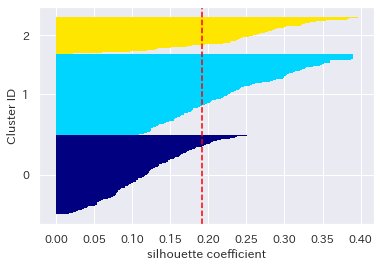

In [33]:
# クラスタのラベル
cluster_labels = np.unique(pred_k)
# クラスタ数
n_clusters= K
# シルエット係数を計算
# 距離はユークリッド距離を指定
silhouette_vals = silhouette_samples(df_t,pred_k,metric='euclidean')  
# 表の上下の位置を保存するための変数
y_lower, y_upper= 0,0
# ｙ軸のクラスタラベルの表示位置を格納するためのリスト
yticks = []

# カラーマップ用のインポート
from matplotlib import cm

for i in cluster_labels:
    c_silhouette_vals = silhouette_vals[pred_k==i]
    c_silhouette_vals.sort()
    # サンプルの個数をクラスタごとに足し上げてy軸の最大値を決定
    y_upper += len(c_silhouette_vals)
    #クラスタの色を決定する
    color = cm.jet(float(i) / n_clusters)
    # 水平の棒グラフのを描画（底辺の範囲を指定)
    plt.barh(range(y_lower,y_upper),
             c_silhouette_vals,
             height=1.0,edgecolor='none',
             color=color)
    # クラスタラベルの表示位置を追加        
    yticks.append((y_lower + y_upper) / 2)
    # 底辺の値に棒の幅を追加
    y_lower += len(c_silhouette_vals)
# シルエット係数の平均値
silhouette_avg = np.mean(silhouette_vals)
# 係数の平均値に破線を引く
plt.axvline(silhouette_avg, color="red", linestyle="--")
# クラスタラベルを表示 
plt.yticks(yticks , cluster_labels)                    
plt.ylabel('Cluster ID')
plt.xlabel('silhouette coefficient')
plt.show()

# ③価値観分析（アクションプラン検討）

In [34]:
a = pd.merge(df_t[['cls_ID']],pd.read_csv('data/grouping_values.csv', encoding="shift-jis", engine='python',\
              names=('ID', '新商品', '他者誘導', 'トップ商品', '高価格',  '外出嫌い', '待時間耐性', '商品リピート', 'ポイント好',\
                    'セール好','衝動買い','安定ブランド志向', '口コミ参考', 'シリーズ買い'), skiprows=1).set_index('ID'),\
              how='left', left_index=True, right_index=True)

a

,cls_ID,新商品,他者誘導,トップ商品,高価格,外出嫌い,待時間耐性,商品リピート,ポイント好,セール好,衝動買い,安定ブランド志向,口コミ参考,シリーズ買い
ID,,,,,,,,,,,,,,
1,2,-1,0,0,0,0,-1,0,0,0,0,0,0,1
4,1,0,-4,0,-4,4,-4,2,1,0,1,0,0,0
6,0,-1,-3,3,-1,2,4,4,2,2,-1,-2,3,2
7,0,-1,-3,0,-2,0,-2,1,1,-2,1,0,-2,1
9,1,-2,-1,-1,-1,1,-1,0,0,-1,-1,0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,0,1,1,1,0,1,1,1,3,1,0,-3,1,0
1059,1,0,-2,-2,-2,2,-3,2,2,2,1,0,2,3
1063,0,0,-1,-1,0,1,-1,-1,-2,-1,-1,0,-1,-1


class 0


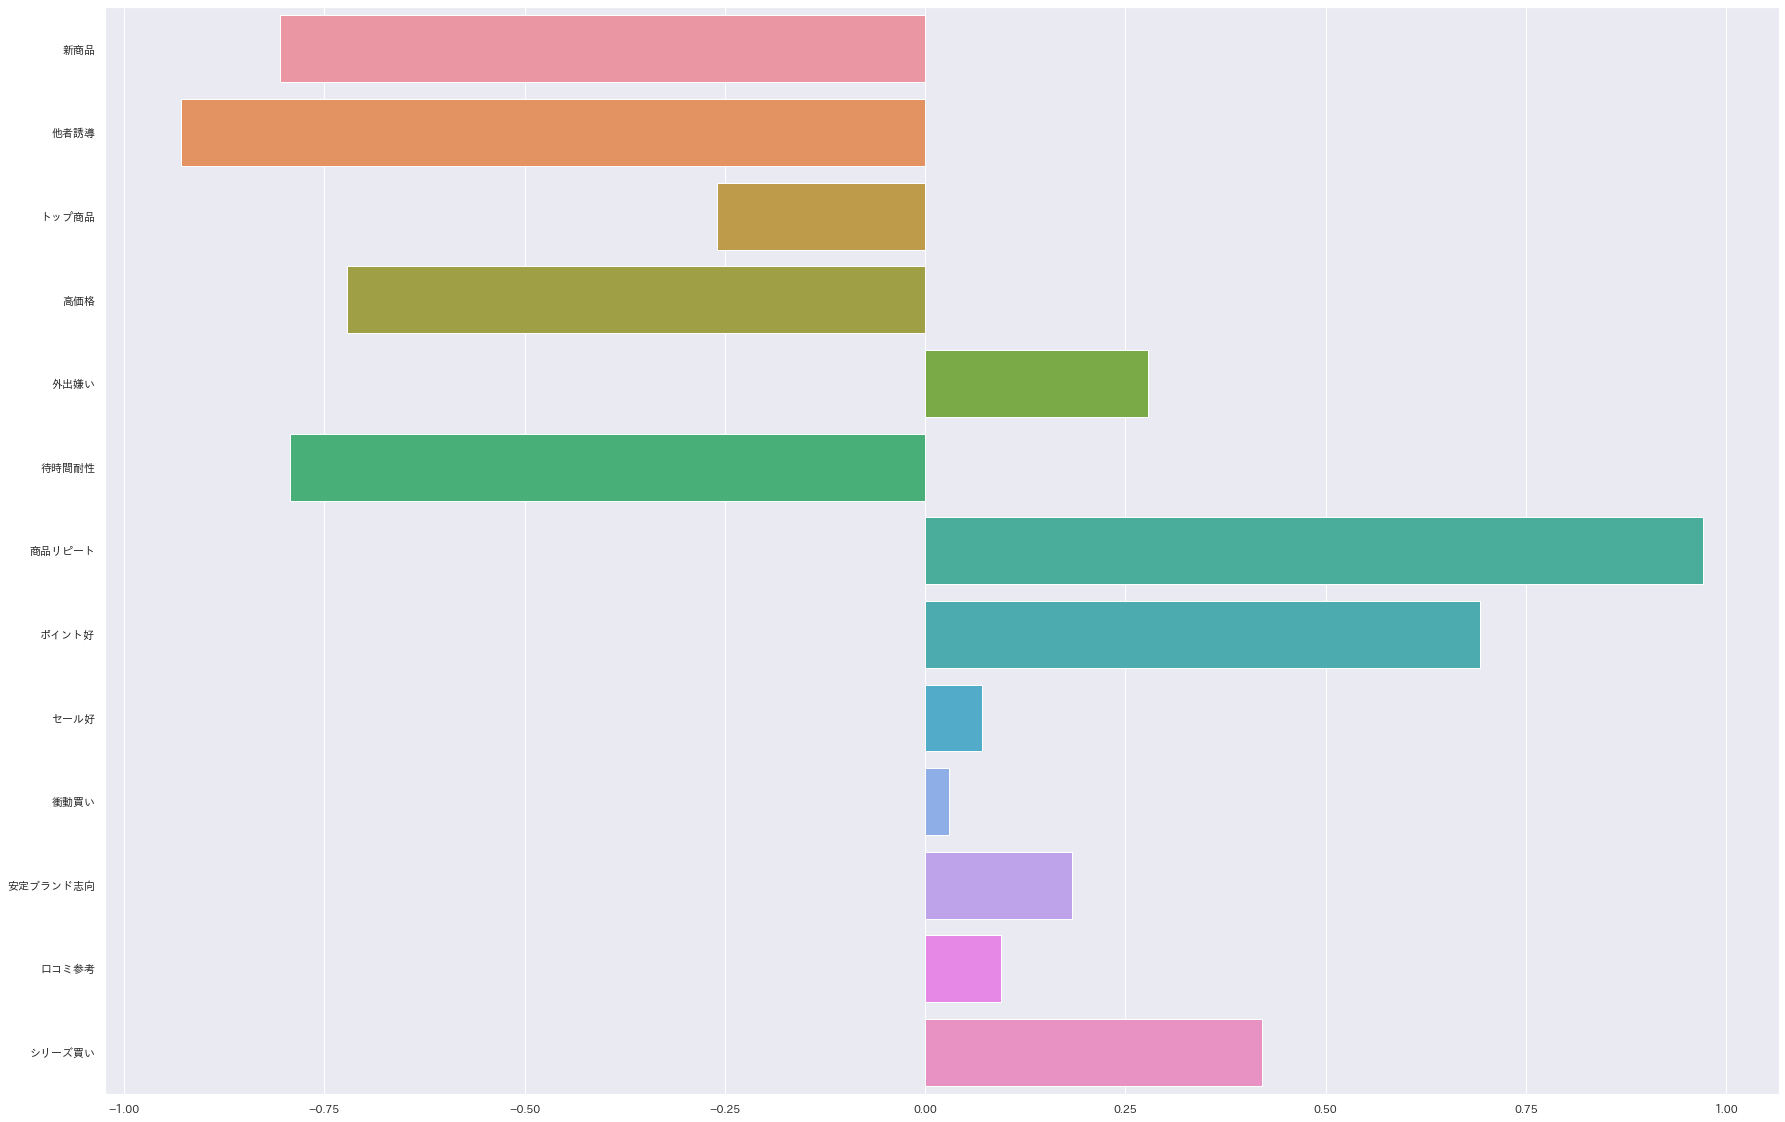

class 1


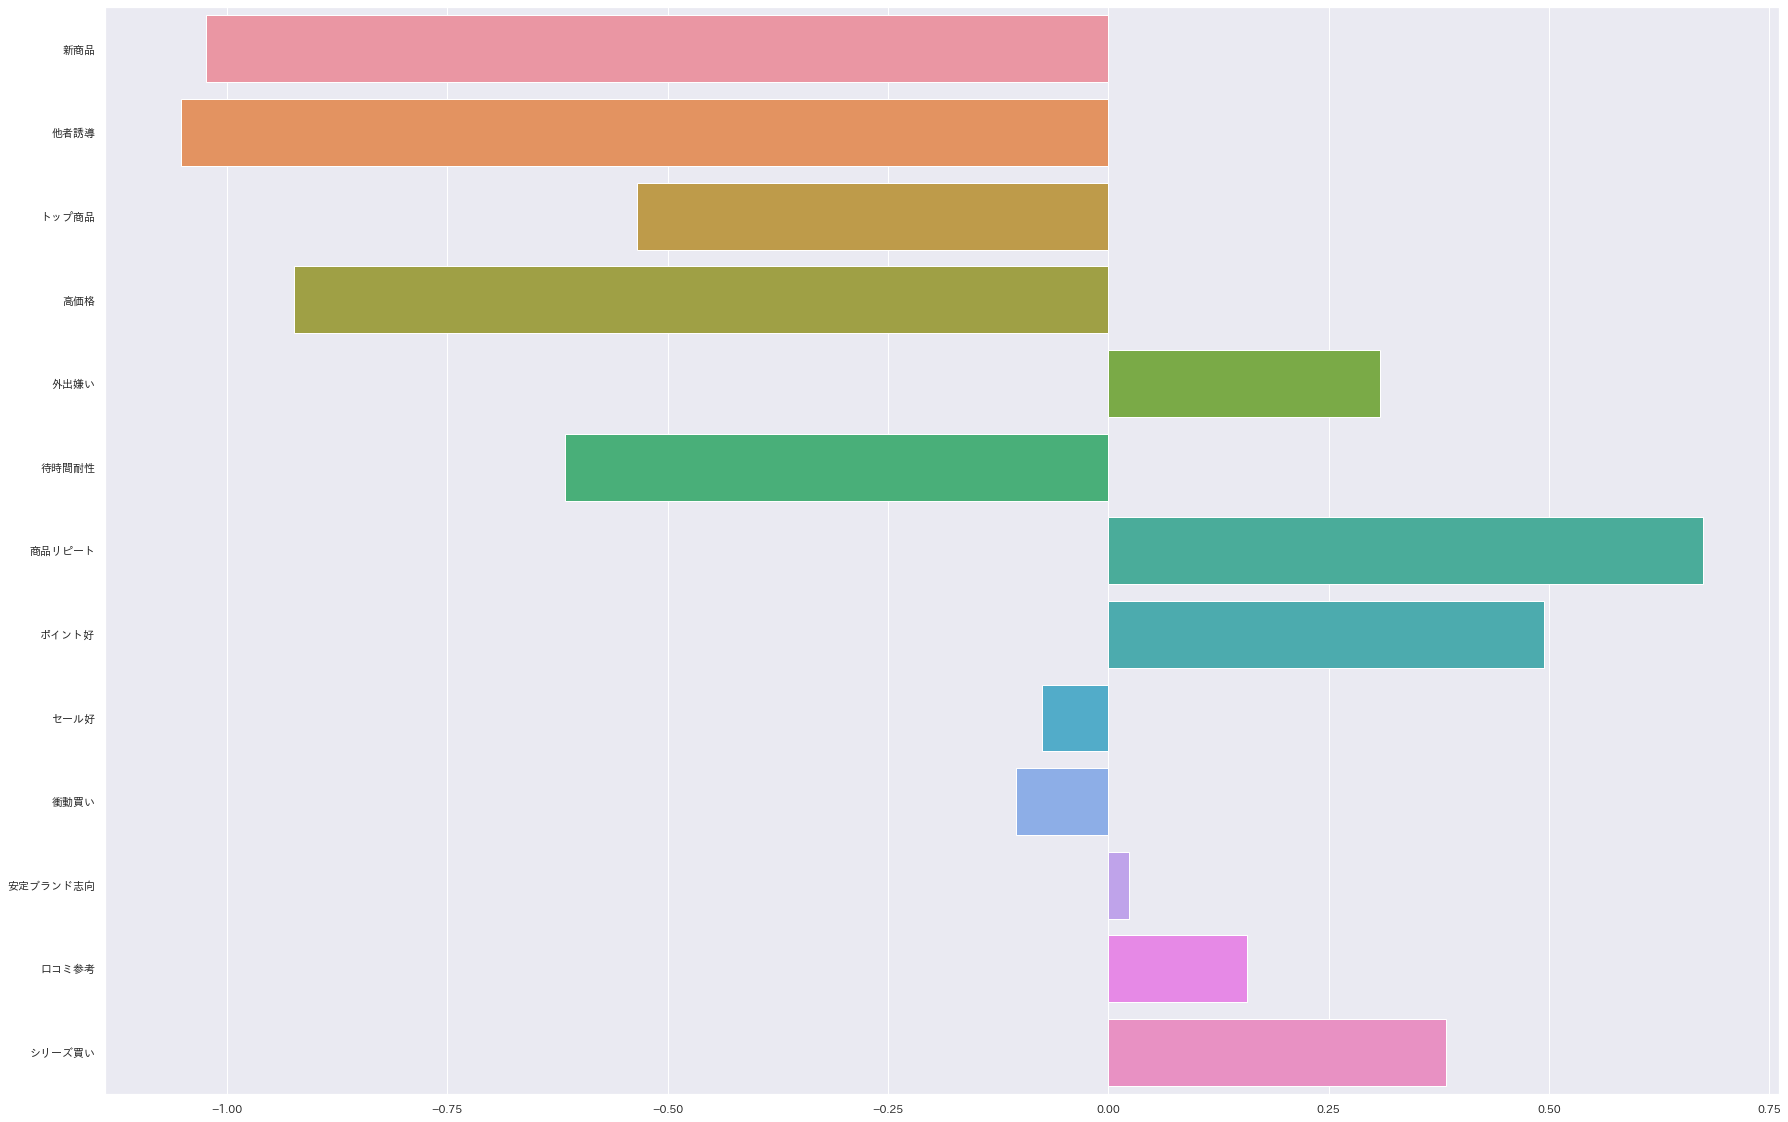

class 2


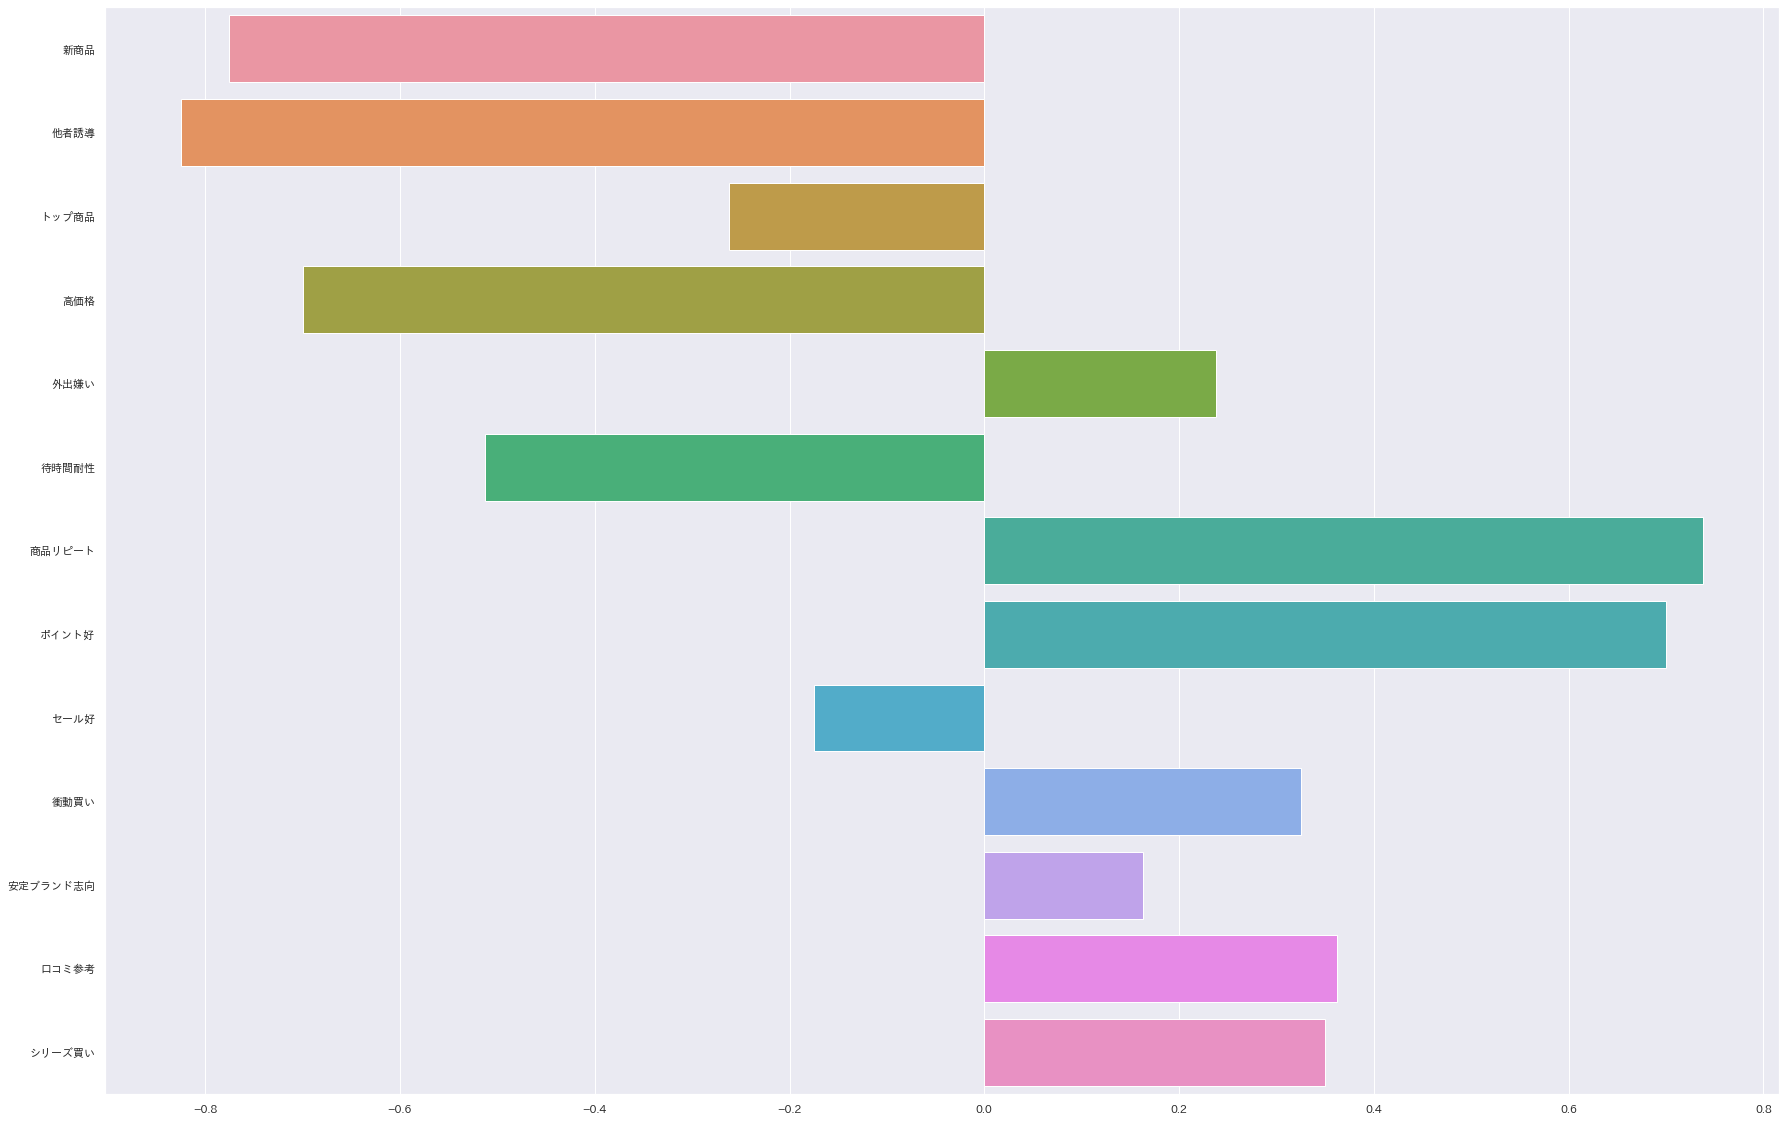

In [35]:
for i in range(K):
    b = a[a['cls_ID']==i].iloc[:,1:]
    print('class',i)
    plt.figure(figsize=(30, 20))
  # sns.set(font='Yu Gothic')
    sns.barplot(data=b, ci=None, orient='h')
    plt.show()

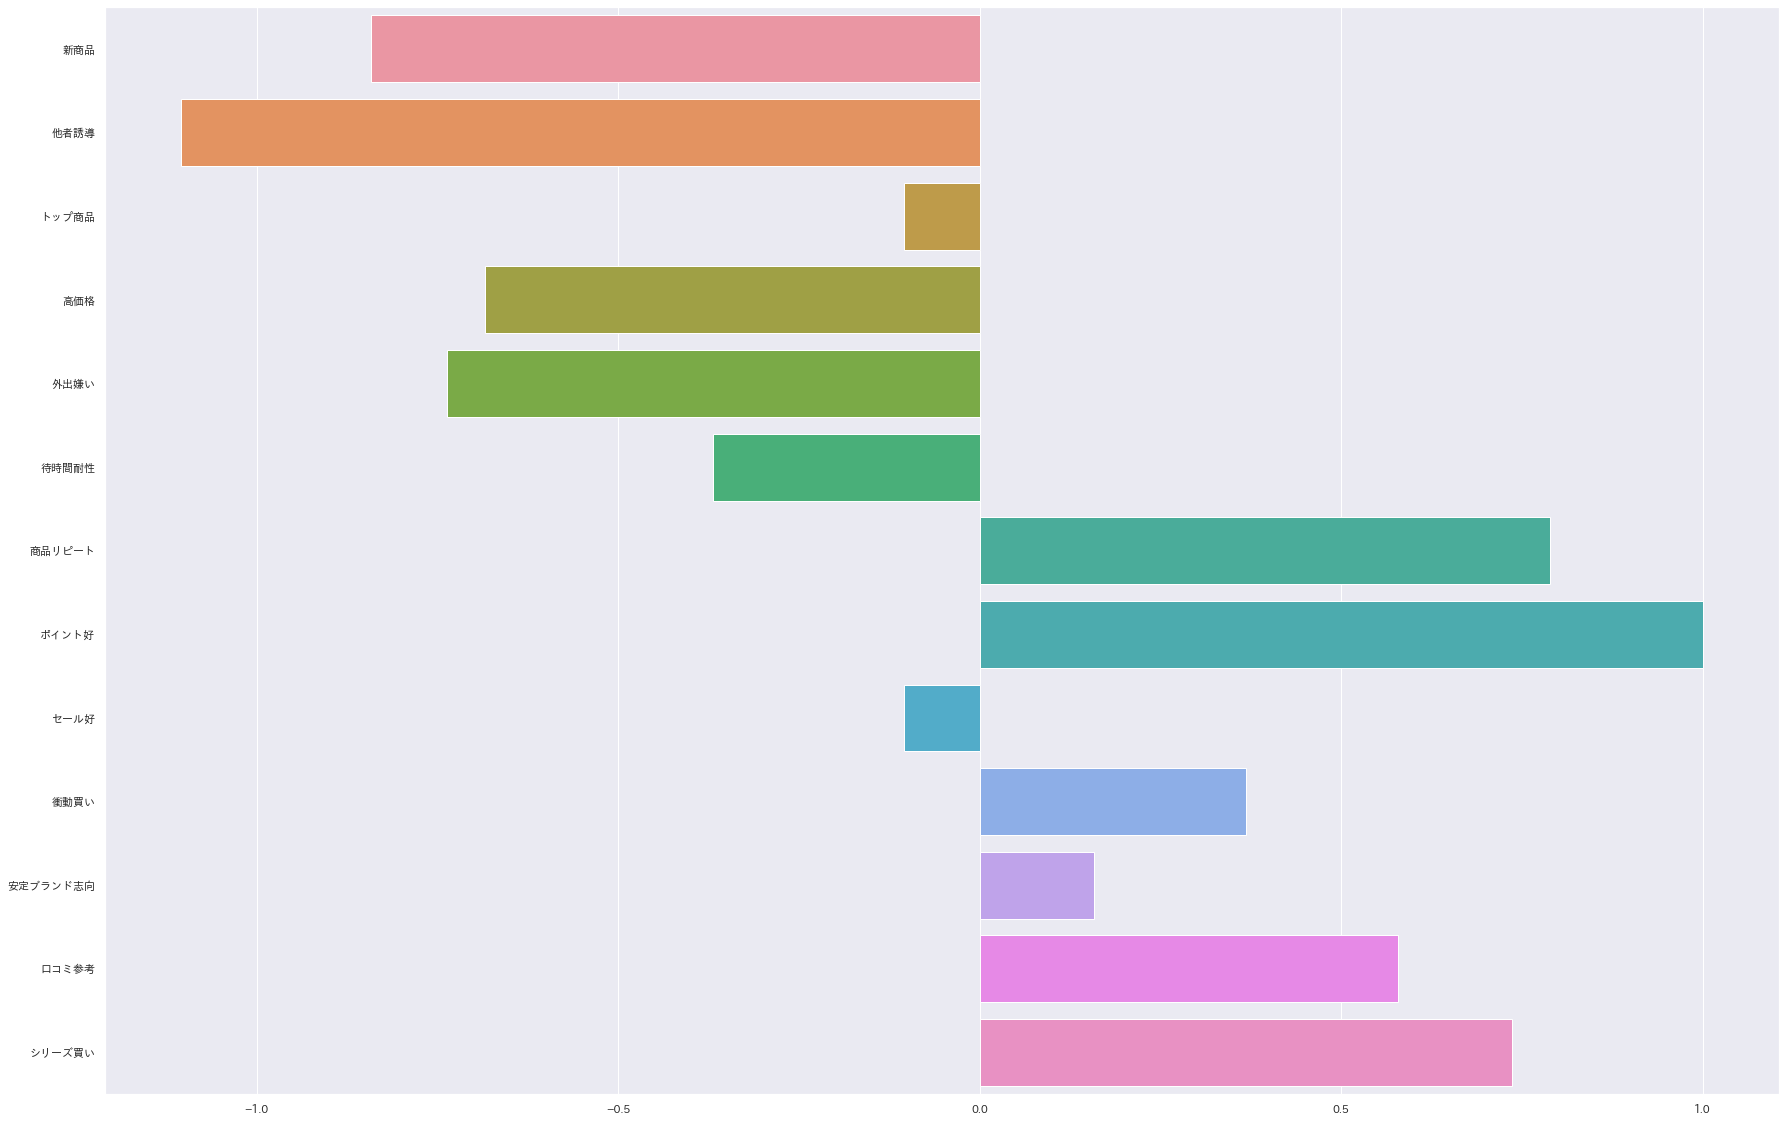

In [27]:
plt.figure(figsize=(30, 20))

sns.barplot(data=b, ci=None, orient='h')
sns.set(font='IPAexGothic')
plt.show()